In [1]:
import pandas as pd
import numpy as np
import os
import math

In [127]:
df = pd.read_csv('final_csvs/all_risk_df_ordered_no_log.csv', index_col=0)

In [128]:
df = df.fillna(0)

In [129]:
df = df.rename({'ranking_y':'ranking'}, axis=1)

In [130]:
df.head()

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,distance_centroid3_x,distance_centroid4_x,cluster_A_x,cluster_B_x,cluster_C_x,cluster_D_x,n_players_y,distance1_2_y,distance1_3_y,distance1_4_y,distance2_3_y,distance2_4_y,distance3_4_y,distance_centroid1_y,distance_centroid2_y,distance_centroid3_y,distance_centroid4_y,cluster_A_y,cluster_B_y,cluster_C_y,cluster_D_y,agility_y,ranking,landing_risk1,landing_risk2,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
0,000fe633-8af8-4037-b318-a1ca39ded6df,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,-9.990000,-9.990000,-9.990000,-9.990000,-9.990000,-9.990000,0.000000,-9.990000,-9.990000,-9.990000,1.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,2.121320
1,000fe633-8af8-4037-b318-a1ca39ded6df,2,0.000000,0.000000,0.000000,418.390210,414.514679,30.646491,0.000000,276.378251,142.610992,138.316843,0.171105,0.146385,0.055556,0.000000,3,99.000000,99.000000,99.000000,116.294178,105.775019,5.984846,99.000000,77.765556,38.662222,29.154722,0.907407,0.083333,0.009259,0.000000,0.305556,24.0,2.0,19.0,49.0,0.0,4.100000,8.076923,2.650000,0.000000,6.463664,11.732511,2.661124,0.000000
2,000fe633-8af8-4037-b318-a1ca39ded6df,3,866.615796,858.782483,840.942177,258.785781,223.967544,47.645528,638.547728,254.697789,228.176702,211.888221,0.241380,0.149161,0.124758,0.056254,4,670.068870,623.830148,590.301084,206.669504,151.517499,23.577984,452.250053,237.548830,185.807766,164.195745,0.677305,0.196365,0.113032,0.013298,0.228723,1.0,0.0,0.0,1.0,0.0,0.731707,1.694301,0.450777,0.201258,1.830544,4.923881,0.934808,0.582225
3,000fe633-8af8-4037-b318-a1ca39ded6df,4,425.944425,417.198576,321.380618,321.229675,154.322329,30.468740,241.120643,187.078206,180.691959,145.038783,0.233654,0.159028,0.124771,0.044885,4,444.532153,420.683508,349.171299,293.890154,129.542092,28.978415,257.515934,195.877912,169.571429,128.809341,0.634615,0.217033,0.140110,0.008242,0.263736,17.0,0.0,0.0,0.0,0.0,0.553191,0.322581,0.414894,0.232558,1.528349,0.768416,0.781638,0.546097
4,000fe633-8af8-4037-b318-a1ca39ded6df,5,186.757953,188.940699,184.901774,36.051585,28.180701,17.629798,137.930967,50.013119,50.756820,46.692071,0.113364,0.113364,0.000000,0.000000,4,83.151572,55.651300,47.965736,21.241060,15.045142,4.900832,50.641506,33.667108,15.481145,9.346867,0.960843,0.039157,0.000000,0.000000,0.246988,8.0,4.0,0.0,0.0,0.0,0.630058,0.444444,0.568047,0.408602,1.843158,0.871572,1.252301,0.875221


First, we look at how many teams have null values in the distance columns, meaning that the teams are of less than 4 people. We look for 99s because we previously made all the distance nans to have value 99. 

In [131]:
for c in df.columns:
    if ('distance' in c) and ('y' in c):
        nns = len([i for i in df[c] if i == 99])
        total = len(df[c])
        print(f'{c} has {(nns/total)*100}% null values')

distance1_2_y has 29.446577849904703% null values
distance1_3_y has 29.378172588832484% null values
distance1_4_y has 29.377464948200704% null values
distance2_3_y has 10.598097861981772% null values
distance2_4_y has 10.541014851018058% null values
distance3_4_y has 6.586247240201535% null values
distance_centroid1_y has 29.587398335629235% null values
distance_centroid2_y has 11.227190383635573% null values
distance_centroid3_y has 7.206612194063366% null values
distance_centroid4_y has 0.0% null values


Then, we drop them. We decide to focus only on 4-player teams.

In [132]:
df = df.replace(99, np.nan)
df = df.dropna()
df = df.drop('n_players_y', axis=1)

For the risk variable, we derive a new interaction variable. This is risk * risk_std since we saw that they were highly correlated, so we try to capture the effect of the variance in risk with another variable.

In [133]:
df['risk_int1'] = df['risk1'] * df['risk_std1']
df['risk_int2'] = df['risk2'] * df['risk_std2']
df['risk_int3'] = df['risk3'] * df['risk_std3']
df['risk_int4'] = df['risk4'] * df['risk_std4']
df = df.drop(['risk_std1','risk_std2','risk_std3','risk_std4'], axis=1)

Now, we order risk variables from highest to lowest, so that the new variables represent from the riskiest player to the least risky player.

In [134]:
risk = df.loc[:, 'risk1':'risk4']
risk = np.sort(risk.values, axis=1)[:,::-1]
df.loc[:, 'risk1':'risk4'] = risk
risk_std = df.loc[:, 'risk_int1':'risk_int4']
risk_std = np.sort(risk_std.values, axis=1)[:,::-1]
df.loc[:, 'risk_int1':'risk_int4'] = risk_std
lrisk = df.loc[:, 'landing_risk1':'landing_risk4']
lrisk = np.sort(lrisk.values, axis=1)[:,::-1]
df.loc[:, 'landing_risk1':'landing_risk4'] = lrisk

Since the sum of the Cluster columns is always 1, we have a very high correlation. For that reason, we drop one of them. In this case, we drop Cluster A because we see that it is the one with the highest correlation with the others.

In [135]:
df.loc[:,'cluster_A_x':'cluster_D_x'].corr()

,cluster_A_x,cluster_B_x,cluster_C_x,cluster_D_x
cluster_A_x,1.000000,0.752828,0.826139,0.680459
cluster_B_x,0.752828,1.000000,0.440376,0.219371
cluster_C_x,0.826139,0.440376,1.000000,0.690342
cluster_D_x,0.680459,0.219371,0.690342,1.000000


In [136]:
df.loc[:,'cluster_A_y':'cluster_D_y'].corr()

,cluster_A_y,cluster_B_y,cluster_C_y,cluster_D_y
cluster_A_y,1.000000,-0.924651,-0.896358,-0.724987
cluster_B_y,-0.924651,1.000000,0.683865,0.473274
cluster_C_y,-0.896358,0.683865,1.000000,0.743550
cluster_D_y,-0.724987,0.473274,0.743550,1.000000


In [137]:
df = df.drop(['cluster_A_x','cluster_A_y'], axis=1)

Now, we merge rankpoints

In [138]:
rkpts = pd.read_csv('experience_data/rankpoints_csv.csv', index_col=0)
df = pd.merge(df, rkpts, how='left', on=['matchId', 'teamId'])

Next, we create the control variables for all the groups of variable.
We will use as control the mean of each group for the match. E.g. for pair distances, we will control for the mean pair player distance of the match.

In [139]:
group = df.groupby(['matchId']).mean().reset_index()
mean_distance = pd.concat([group.matchId, group[['distance1_2_y', 'distance1_3_y', 'distance1_4_y', 'distance2_3_y', 'distance2_4_y', 'distance3_4_y']].apply(np.mean, axis=1)], axis=1)
mean_distance.columns = ['matchId','distance_ctrl']
mean_centroid = pd.concat([group.matchId, group[['distance_centroid1_y', 'distance_centroid2_y', 'distance_centroid3_y', 'distance_centroid4_y']].apply(np.mean, axis=1)], axis=1)
mean_centroid.columns = ['matchId','centroid_ctrl']
mean_cluster = pd.concat([group.matchId, group[['cluster_B_y', 'cluster_C_y','cluster_D_y']].apply(np.mean, axis=1)], axis=1)
mean_cluster.columns = ['matchId','cluster_ctrl']
mean_exp = pd.concat([group.matchId, group[['exp1', 'exp2', 'exp3', 'exp4']].apply(np.mean, axis=1)], axis=1)
mean_exp.columns = ['matchId','exp_ctrl']
mean_risk = pd.concat([group.matchId, group[['risk1', 'risk2', 'risk3', 'risk4']].apply(np.mean, axis=1)], axis=1)
mean_risk.columns = ['matchId','risk_ctrl']
# mean_lrisk = pd.concat([group.matchId, group[['landing_risk1', 'landing_risk2', 'landing_risk3', 'landing_risk4']].apply(np.mean, axis=1)], axis=1)
# mean_lrisk.columns = ['matchId','landing_risk_ctrl']
mean_agi = group[['matchId', 'agility_y']]
mean_agi.columns = ['matchId','agi_ctrl']
df = pd.merge(df, mean_distance, how = 'left', on="matchId")
df = pd.merge(df, mean_centroid, how = 'left', on="matchId")
df = pd.merge(df, mean_cluster, how = 'left', on="matchId")
df = pd.merge(df, mean_exp, how = 'left', on="matchId")
df = pd.merge(df, mean_risk, how = 'left', on="matchId")
# df = pd.merge(df, mean_lrisk, how = 'left', on="matchId")
df = pd.merge(df, mean_agi, how = 'left', on="matchId")

Now, since experience was already a control variable, we are going to engineer the variable. For that, we are going to normalize the experiences of the palyers by the mean experience of the match, and then we are going to get the aggregate experience for the team. We sum 1 to the denominator in case there is some mean exp that is equal to 0.

In [140]:
df['exp1'] = df['exp1'] / (df['exp_ctrl'] + 1)
df['exp2'] = df['exp2'] / (df['exp_ctrl'] + 1)
df['exp3'] = df['exp3'] / (df['exp_ctrl'] + 1)
df['exp4'] = df['exp4'] / (df['exp_ctrl'] + 1)
df['exp'] = df['exp1'] + df['exp2'] + df['exp3'] + df['exp4']
df = df.drop(['exp1','exp2','exp3','exp4', 'exp_ctrl'], axis=1)

Since we have many players for whom we don't know the experience, we are going to drop them.<br><BR>
(NOT SURE ABOUT THIS, I THINK IT MAKES THE MODEL WORSE SO I COMMENTED IT) Then, we are going to recalculate the rankings for our regression tasks. The goal is to show the ranking in the match of the teams that we have information about. E.g. if for a match we only have 4 teams left, ranks 1,5,9,11, the new ranks will be 1,2,3,4 respectively.

In [141]:
df = df.dropna()
# for match in df.matchId.unique():
#     df.loc[df.matchId == match,'new_ranking'] = df.loc[df.matchId == match,'ranking'].rank()

To make things easiear, we make sure that ranking is the last column.

In [142]:
ranking = df.pop('ranking')
df.insert(df.shape[1], 'ranking', ranking)

Since we have many variables ordered, we drop the middle variables to stay only with max and min variables (they don't add much to the model).

In [143]:
df = df.drop(['distance1_3_x', 'distance1_4_x', 'distance2_3_x', 'distance2_4_x',
              'distance1_3_y', 'distance1_4_y', 'distance2_3_y', 'distance2_4_y', 
              'distance_centroid2_x', 'distance_centroid3_x', 'distance_centroid2_y', 'distance_centroid3_y',
              'risk2', 'risk3', 'risk_int2', 'risk_int3', 'landing_risk2','landing_risk3'], axis=1)

In [144]:
pd.set_option('display.max_columns', 48)
pd.DataFrame(df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,matchId,teamId,distance1_2_x,distance3_4_x,distance_centroid1_x,distance_centroid4_x,cluster_B_x,cluster_C_x,cluster_D_x,distance1_2_y,distance3_4_y,distance_centroid1_y,distance_centroid4_y,cluster_B_y,cluster_C_y,cluster_D_y,agility_y,landing_risk1,landing_risk4,risk1,risk4,risk_int1,risk_int4,distance_ctrl,centroid_ctrl,cluster_ctrl,risk_ctrl,agi_ctrl,exp,ranking


Then, we separate the two df that we are going to study

In [168]:
# distances and centroids
df1 = pd.concat([df.iloc[:,0:6], df.iloc[:,9:13], df.iloc[:,16:25], df.iloc[:,26:]], axis=1)

# distances and clusters
df2 = pd.concat([df.iloc[:,0:4], df.iloc[:,6:11], df.iloc[:,13:24], df.iloc[:,25:]], axis=1)


Here, I just check the correlations. There is probably something that we can do about high correlations, though.

In [169]:
df2.iloc[:,2:].corr().style.apply(lambda x: ["background: red" if abs(v) > 0.75 else "" for v in x], axis = 1)

,distance1_2_x,distance3_4_x,cluster_B_x,cluster_C_x,cluster_D_x,distance1_2_y,distance3_4_y,cluster_B_y,cluster_C_y,cluster_D_y,agility_y,landing_risk1,landing_risk4,risk1,risk4,risk_int1,risk_int4,distance_ctrl,cluster_ctrl,risk_ctrl,agi_ctrl,exp,ranking
distance1_2_x,1,0.438881,0.208932,0.42756,0.40087,0.811931,0.284841,0.385352,0.418999,0.338804,-0.130943,-0.205583,-0.206786,-0.177473,-0.262474,-0.125155,-0.142843,0.488381,0.411544,-0.338419,-0.134306,-0.0938988,0.107396
distance3_4_x,0.438881,1,0.14828,0.467388,0.675099,0.478311,0.843018,0.362245,0.558062,0.711003,-0.0686545,-0.208638,-0.182441,-0.189172,-0.228596,-0.126908,-0.130368,0.34414,0.324802,-0.242611,-0.075991,-0.0608774,0.0186199
cluster_B_x,0.208932,0.14828,1,0.430691,0.197662,0.154466,0.0642551,0.627416,0.216019,0.0903913,0.0729422,-0.232438,-0.288469,-0.268299,-0.375432,-0.197643,-0.257156,0.219496,0.297356,-0.240091,-0.0519605,-0.0733902,-0.0986852
cluster_C_x,0.42756,0.467388,0.430691,1,0.673708,0.450723,0.405849,0.685156,0.839799,0.517345,0.0112444,-0.353847,-0.352442,-0.353971,-0.4338,-0.248022,-0.261157,0.397187,0.477237,-0.38641,-0.109355,-0.098319,0.00309993
cluster_D_x,0.40087,0.675099,0.197662,0.673708,1,0.439733,0.620841,0.482224,0.743056,0.876448,-0.0670197,-0.295512,-0.255937,-0.27978,-0.319523,-0.18641,-0.178932,0.372393,0.420029,-0.33779,-0.118076,-0.0700813,0.00278161
distance1_2_y,0.811931,0.478311,0.154466,0.450723,0.439733,1,0.397695,0.541287,0.543145,0.422947,-0.133927,-0.181721,-0.189569,-0.157808,-0.246071,-0.108046,-0.137031,0.434579,0.359147,-0.247929,-0.133612,-0.0795202,0.0812693
distance3_4_y,0.284841,0.843018,0.0642551,0.405849,0.620841,0.397695,1,0.340825,0.567213,0.751977,0.169107,-0.187775,-0.140064,-0.204826,-0.18591,-0.134156,-0.111158,0.24203,0.22717,-0.18909,0.0512301,-0.0384491,0.052109
cluster_B_y,0.385352,0.362245,0.627416,0.685156,0.482224,0.541287,0.340825,1,0.653065,0.401636,0.0335801,-0.269942,-0.312862,-0.261957,-0.392798,-0.184036,-0.250041,0.324933,0.406513,-0.263672,-0.108389,-0.0734558,0.0522507
cluster_C_y,0.418999,0.558062,0.216019,0.839799,0.743056,0.543145,0.567213,0.653065,1,0.70786,-0.0313669,-0.289954,-0.26863,-0.273543,-0.336953,-0.185232,-0.194467,0.348974,0.413309,-0.295113,-0.113676,-0.0617138,0.0586138
cluster_D_y,0.338804,0.711003,0.0903913,0.517345,0.876448,0.422947,0.751977,0.401636,0.70786,1,-0.0698344,-0.223979,-0.183393,-0.204914,-0.232358,-0.134037,-0.127158,0.282801,0.322212,-0.237231,-0.0945534,-0.0376544,0.036044


# EDA

In [42]:
pd.set_option('display.max_columns', 45)

In [45]:
df.columns

Index(['matchId', 'teamId', 'distance1_2_x', 'distance1_3_x', 'distance1_4_x',
       'distance2_3_x', 'distance2_4_x', 'distance3_4_x',
       'distance_centroid1_x', 'distance_centroid2_x', 'distance_centroid3_x',
       'distance_centroid4_x', 'cluster_B_x', 'cluster_C_x', 'cluster_D_x',
       'distance1_2_y', 'distance1_3_y', 'distance1_4_y', 'distance2_3_y',
       'distance2_4_y', 'distance3_4_y', 'distance_centroid1_y',
       'distance_centroid2_y', 'distance_centroid3_y', 'distance_centroid4_y',
       'cluster_B_y', 'cluster_C_y', 'cluster_D_y', 'agility_y',
       'landing_risk1', 'landing_risk2', 'landing_risk3', 'landing_risk4',
       'risk1', 'risk2', 'risk3', 'risk4', 'ranking'],
      dtype='object')

The _x_ variables represent standard deviations, while the _y_ variables represent means

In [46]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,distance_centroid3_x,distance_centroid4_x,cluster_B_x,cluster_C_x,cluster_D_x,distance1_2_y,distance1_3_y,distance1_4_y,distance2_3_y,distance2_4_y,distance3_4_y,distance_centroid1_y,distance_centroid2_y,distance_centroid3_y,distance_centroid4_y,cluster_B_y,cluster_C_y,cluster_D_y,agility_y,landing_risk1,landing_risk2,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,ranking
count,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000,277816.000000
mean,31.550803,1.220040,1.221193,1.219403,1.220157,1.219421,1.220266,1.250294,1.249434,1.249845,1.251675,0.134697,0.073844,0.033191,4.425895,4.432289,4.444075,4.426827,4.436604,4.434747,3.960695,3.958650,3.960000,3.964661,0.129494,0.046273,0.014079,0.221665,13.566278,13.539381,13.483013,13.461064,183.236947,183.848328,183.070045,184.844614,12.408443
std,58.293427,0.414806,0.416072,0.415408,0.414611,0.415657,0.416274,0.505439,0.505075,0.506130,0.508817,0.045111,0.047030,0.039717,1.290691,1.289716,1.286070,1.290595,1.290509,1.293812,1.187391,1.187341,1.186827,1.188483,0.085529,0.051684,0.026075,0.119004,25.506246,25.386123,25.343427,25.486359,622.812845,627.091785,624.856011,632.111689,7.750957
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.795140,-0.791748,-0.912787,-1.569801,-0.212611,-1.252473,-0.532559,-0.084660,0.000000,-1.274496,0.000000,0.000000,0.000000,0.006993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.952876,0.953222,0.950896,0.952763,0.951395,0.951849,0.923141,0.921681,0.921768,0.922271,0.113191,0.037261,0.000000,3.550509,3.553670,3.564977,3.550995,3.559805,3.556852,3.158702,3.154917,3.158138,3.161746,0.060386,0.005495,0.000000,0.130435,0.000000,0.000000,0.000000,0.000000,0.625734,0.626848,0.626120,0.625235,6.000000
50%,13.000000,1.179662,1.180634,1.178632,1.180385,1.179353,1.179985,1.146107,1.145677,1.145695,1.146288,0.137960,0.079749,0.019582,4.130457,4.137393,4.148644,4.130803,4.141877,4.138695,3.717562,3.715503,3.717301,3.722817,0.121005,0.027344,0.001534,0.205607,3.000000,3.000000,3.000000,3.000000,9.800190,9.876956,9.874124,9.743855,12.000000
75%,21.000000,1.441132,1.444389,1.442038,1.441926,1.443497,1.442807,1.448741,1.447298,1.447752,1.449512,0.162728,0.115637,0.060978,5.093096,5.102378,5.116114,5.091230,5.107058,5.103649,4.580354,4.575755,4.577439,4.582676,0.186330,0.072279,0.015625,0.291667,15.625000,15.625000,15.625000,15.625000,105.353467,105.367430,105.623687,105.772370,18.000000
max,205.000000,8.786091,8.356210,7.788996,7.047822,5.825716,6.716424,8.448849,9.651332,7.240186,11.380225,0.353553,0.176777,0.144338,9.139036,9.135439,9.153829,9.071639,9.120486,9.193517,8.855117,8.801846,8.580758,8.826189,0.500000,0.310920,0.250000,1.000000,246.875000,246.875000,246.875000,246.875000,18122.958320,18019.558350,19342.568428,18328.323613,36.000000


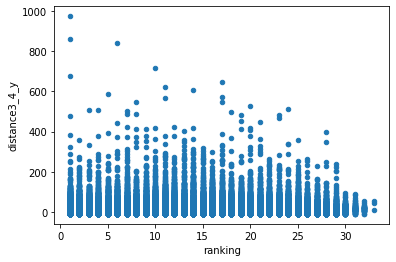

In [299]:
df.plot.scatter('ranking','distance3_4_y')

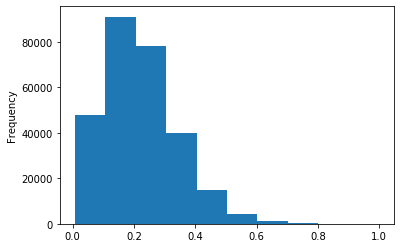

In [52]:
df['agility_y'].plot.hist()

# Models

In [27]:
import numpy as np
import pandas as pd
import os
import math
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, SGDClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier, XGBRegressor

## All variables

From now on, I use the df with distances and cluster, not centroids

In [170]:
X = df2.iloc[:,2:-1]
y = df2.iloc[:,[-1]]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=6, shuffle=True)

In [67]:
# Scale between 0 and 1
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
X_train=pd.DataFrame(X_train, columns=X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Regression

In [172]:
# Linear Regression
X_t=sm.add_constant(X_train)
model = sm.OLS(y_train,X_t.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     2984.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:58:36   Log-Likelihood:            -4.0602e+05
No. Observations:              125388   AIC:                         8.121e+05
Df Residuals:                  125365   BIC:                         8.123e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.1844      0.169     84.178      0.000      13.854      14.515
distance1_2_x     0.0026   8.61e-05     30.706      0.000       0.002       0.003
distance3_4_x     0.0501      0.001     41.425      0.000       0.048       0.053
cluster_B_x     -41.9736      0.584    -71.875      0.000     -43.118     -40.829
cluster_C_x     -31.2027      0.919    -33.960      0.000     -33.004     -29.402
cluster_D_x     -59.4898      1.340    -44.407      0.000     -62.115     -56.864
distance1_2_y    -0.0013   8.76e-05    -15.334      0.000      -0.002      -0.001
distance3_4_y    -0.1174      0.002    -60.798      0.000      -0.121      -0.114
cluster_B_y      21.9976      0.444     49.537      0.000      21.127      22.868
cluster_C_y      26.7510      1.074     24.898      0.000      24.645      28.857
cluster_D_y     121.9631      2.746     44.407      0.000     116.580     127.346
agility_y        33.6632      0.180    187.292      0.000      33.311      34.016
landing_risk1    -0.0175      0.001    -27.297      0.000      -0.019      -0.016
landing_risk4    -0.0168      0.003     -6.552      0.000      -0.022      -0.012
risk1             0.2678      0.003     76.583      0.000       0.261       0.275
risk4             0.0280      0.008      3.332      0.001       0.012       0.044
risk_int1        -0.0023   4.23e-05    -54.744      0.000      -0.002      -0.002
risk_int4         0.0002      0.000      1.093      0.274      -0.000       0.001
distance_ctrl     0.0015      0.000      3.941      0.000       0.001       0.002
cluster_ctrl      3.8688      1.992      1.942      0.052      -0.036       7.773
risk_ctrl        -0.4928      0.005    -92.279      0.000      -0.503      -0.482
agi_ctrl        -16.3499      0.426    -38.407      0.000     -17.184     -15.516
exp              -0.1355      0.009    -15.814      0.000      -0.152      -0.119
==============================================================================
Omnibus:                     1133.864   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.493
Skew:                           0.150   Prob(JB):                    2.96e-206
Kurtosis:                       2.697   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
y_pred = model.predict(X_t)

In [99]:
metrics.r2_score(y_train, y_pred)

0.3285925694749121

In [100]:
mean_squared_error(y_train, y_pred)

1.548611500677998

In [101]:
X_ts = sm.add_constant(X_test)
y_pred = model.predict(X_ts)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
metrics.r2_score(y_test, y_pred)

0.32095549569336956

In [103]:
mean_squared_error(y_test, y_pred)

1.5826395142704732

In [107]:
# Linear regression (scikit learn)
kfold=KFold(n_splits=10, random_state=7)

model=LinearRegression()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(f'Linear Regression - MSE {results.mean():.3f} std {results.std():.3f}')

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()

res_w1["Res"]=results
res_w1["Type"]="Lin"

resall=pd.concat([resall,res_w1], ignore_index=True)

# Now lets use it in the same way than the statsmodel

model_x=LinearRegression()
model_x.fit(X_train,y_train)
print(f'Intercept {model_x.intercept_}')
print("Coefficients ",model_x.coef_)

y_pred_x=model_x.predict(X_train)

print(f'MAE - Mean Absolute Error {mean_absolute_error(y_train, y_pred_x):.3f}')
print(f'MSE - Mean Square Error  {mean_squared_error(y_train, y_pred_x):.3f}')
print(f'R2    {metrics.r2_score(y_train, y_pred_x):.3f}')

Linear Regression - MSE -1.550 std 0.021
Intercept [3.28683056]
Coefficients  [[-7.18367598e+00 -4.72359573e+00 -7.91584352e+00  2.50745787e-04
  -2.19268923e-02  3.22363263e+00  4.19498418e+00  2.52275525e+01
   6.63331166e+00 -3.46742860e-03 -3.28757080e-03  5.45529183e-02
   2.62053803e-03 -4.71797873e-04  7.50966692e-05  8.11149864e-04
   3.88547384e-01 -9.85330448e-02 -3.12074034e+00 -2.70415084e-02
  -1.42241010e-08  2.36594405e-05]]
MAE - Mean Absolute Error 1.022
MSE - Mean Square Error  1.549
R2    0.329


In [108]:
y_pred = model_x.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


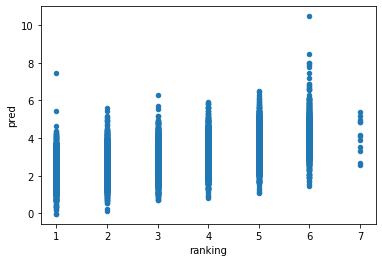

In [109]:
y_test['pred'] = y_pred
y_test.plot.scatter('ranking','pred')

In [201]:
# Ridge Regression
kfold=KFold(n_splits=10, random_state=7)

model=Ridge()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

print(f'Ridge Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Ridge"

resall=pd.concat([resall,res_w1], ignore_index=True)

Ridge Regression - MSE -40.297 std 0.578


In [202]:
model=Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [203]:
y_pred = model.predict(X_train)

In [204]:
metrics.r2_score(y_train, y_pred)

0.30242606619619694

In [205]:
mean_squared_error(y_train, y_pred)

40.274078246631724

In [206]:
y_pred = model.predict(X_test)

In [207]:
metrics.r2_score(y_test, y_pred)

0.3073767795872324

In [208]:
mean_squared_error(y_test, y_pred)

39.60672799782415

In [ ]:
# KNN Regression
kfold=KFold(n_splits=10, random_state=7)

model=KNeighborsRegressor()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

print(f'KNN Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="KNN"

resall=pd.concat([resall,res_w1], ignore_index=True)

In [209]:
model=KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
metrics.r2_score(y_train, y_pred)

In [ ]:
mean_squared_error(y_train, y_pred)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

### Classification

In [241]:
dfc = df2.copy()
dfc['ranking'] = dfc['ranking'].apply(lambda x: 1 if x <=5 else 0)

In [242]:
X = dfc.iloc[:,2:-1]
y = dfc.iloc[:,-1]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=6, shuffle = True)

In [198]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [303]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
y_pred = model.predict(X_train)
print('TRAIN METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred)}')
metrics.confusion_matrix(y_train,y_pred)

TRAIN METRICS
Accuracy: 0.6638753309726608
F1 Score: 0.5086160662236212


array([[61430, 33953],
       [ 8193, 21812]], dtype=int64)

In [305]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     95383
           1       0.39      0.73      0.51     30005

    accuracy                           0.66    125388
   macro avg       0.64      0.69      0.63    125388
weighted avg       0.76      0.66      0.69    125388



In [306]:
y_pred = model.predict(X_test)
print('TEST METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred)}')
metrics.confusion_matrix(y_test,y_pred)

TEST METRICS
Accuracy: 0.6641785688652838
F1 Score: 0.5061741424802111


array([[6856, 3781],
       [ 898, 2398]], dtype=int64)

In [307]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.75     10637
           1       0.39      0.73      0.51      3296

    accuracy                           0.66     13933
   macro avg       0.64      0.69      0.63     13933
weighted avg       0.77      0.66      0.69     13933



STOCHASTIC GRADIENT DESCENT

In [204]:
model = SGDClassifier(class_weight='balanced')
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [205]:
y_pred = model.predict(X_train)
print('TRAIN METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred)}')
metrics.confusion_matrix(y_train,y_pred)

TRAIN METRICS
Accuracy: 0.6949389096245254
F1 Score: 0.7061209751150516


array([[41183, 26900],
       [11351, 45954]], dtype=int64)

In [206]:
y_pred = model.predict(X_test)
print('TEST METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred)}')
metrics.confusion_matrix(y_test,y_pred)

TEST METRICS
Accuracy: 0.6887963826885811
F1 Score: 0.7003041194359968


array([[4531, 3067],
       [1269, 5066]], dtype=int64)

XGBCLASSIFIER

In [150]:
len([i for i in y_train if i == 0]) / len([i for i in y_train if i == 1])

3.128414478139815

In [294]:
model = XGBClassifier(scale_pos_weight=2.5, booster='gbtree', gamma=65, min_child_weight=50)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=65, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=50, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2.5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
y_pred = model.predict(X_train)
print('TRAIN METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred)}')
metrics.confusion_matrix(y_train,y_pred)

TRAIN METRICS
Accuracy: 0.763932752735509
F1 Score: 0.6022681465158153


array([[73377, 22006],
       [ 7594, 22411]], dtype=int64)

In [296]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83     95383
           1       0.50      0.75      0.60     30005

    accuracy                           0.76    125388
   macro avg       0.71      0.76      0.72    125388
weighted avg       0.81      0.76      0.78    125388



In [297]:
metrics.average_precision_score(y_train,y_pred)

0.43742363973360326

In [298]:
metrics.roc_auc_score(y_pred,y_train)

0.7053862004307303

In [299]:
y_pred = model.predict(X_test)
print('TEST METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred)}')
metrics.confusion_matrix(y_test,y_pred)

TEST METRICS
Accuracy: 0.7561185674298428
F1 Score: 0.5835784313725491


array([[8154, 2483],
       [ 915, 2381]], dtype=int64)

In [300]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10637
           1       0.49      0.72      0.58      3296

    accuracy                           0.76     13933
   macro avg       0.69      0.74      0.71     13933
weighted avg       0.80      0.76      0.77     13933



In [301]:
metrics.average_precision_score(y_test,y_pred)

0.4192924060248118

In [302]:
metrics.roc_auc_score(y_pred,y_test)

0.6943108250670299

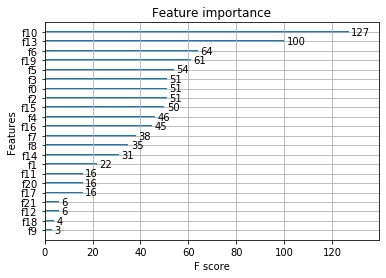

In [239]:
from xgboost import plot_importance
plot_importance(model.get_booster())

In [240]:
pd.DataFrame(X.columns)

,0
0,distance1_2_x
1,distance3_4_x
2,cluster_B_x
3,cluster_C_x
4,cluster_D_x
5,distance1_2_y
6,distance3_4_y
7,cluster_B_y
8,cluster_C_y
9,cluster_D_y
